In [129]:
import torch
import matplotlib.pyplot as plt
from torch import nn

In [130]:
#creating a straight line dataset using linear regression formula
weight = 0.3
bias = 0.9

X = torch.arange(0,1,0.01).unsqueeze(dim=1)
y = weight * X + bias
X,X.numel(),y

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900],
         [0.1000],
         [0.1100],
         [0.1200],
         [0.1300],
         [0.1400],
         [0.1500],
         [0.1600],
         [0.1700],
         [0.1800],
         [0.1900],
         [0.2000],
         [0.2100],
         [0.2200],
         [0.2300],
         [0.2400],
         [0.2500],
         [0.2600],
         [0.2700],
         [0.2800],
         [0.2900],
         [0.3000],
         [0.3100],
         [0.3200],
         [0.3300],
         [0.3400],
         [0.3500],
         [0.3600],
         [0.3700],
         [0.3800],
         [0.3900],
         [0.4000],
         [0.4100],
         [0.4200],
         [0.4300],
         [0.4400],
         [0.4500],
         [0.4600],
         [0.4700],
         [0.4800],
         [0.4900],
         [0.5000],
         [0.5100],
         [0.

In [131]:
# splitting training and testing set
train_split = int(0.8*len(X)) #80% of total datapoints are reserved for training, rest for testing.
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]
X_train.numel(),X_test.numel(),y_train.numel(),y_test.numel()

(80, 20, 80, 20)

In [132]:
# function for plotting data predictions
def plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=None):
    plt.figure(figsize=(5,5))
    plt.scatter(train_data,train_labels,c='b',s=4,label="Training data")
    plt.scatter(test_data,test_labels,c='y',s=4,label="Testing data")

    if predictions is not None:
        plt.scatter(test_data,predictions,c='r',s=4,label="predictions")

    plt.legend()

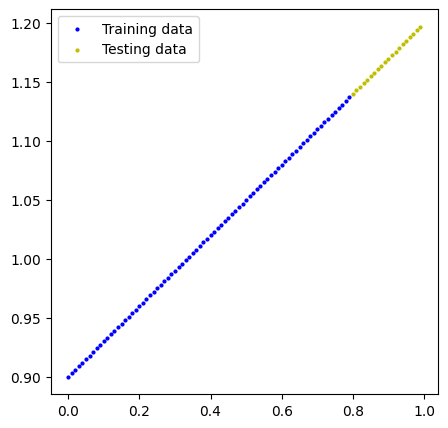

In [133]:
plot_predictions();

In [134]:
#BUILDING THE MODEL
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float)) #nn.Parameter is trying to register our parameters in the parameters() method of the module so that optimizers can update the paramters from the parameters().
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float)) #nn.Parameter is trying to register our parameters in the parameters() method of the module so that optimizers can update the paramters from the parameters().

    def forward(self,X:torch.tensor)-> torch.Tensor:
        return self.weights * X + self.bias
        

In [157]:
torch.manual_seed(8)
model = LinearRegressionModel()

In [158]:
model.state_dict(),list(model.parameters())

(OrderedDict([('weights', tensor([0.2713])), ('bias', tensor([-1.2729]))]),
 [Parameter containing:
  tensor([0.2713], requires_grad=True),
  Parameter containing:
  tensor([-1.2729], requires_grad=True)])

In [159]:
with torch.inference_mode():
    y_preds = model(X_test)
y_preds

tensor([[-1.0559],
        [-1.0532],
        [-1.0505],
        [-1.0478],
        [-1.0450],
        [-1.0423],
        [-1.0396],
        [-1.0369],
        [-1.0342],
        [-1.0315],
        [-1.0288],
        [-1.0261],
        [-1.0233],
        [-1.0206],
        [-1.0179],
        [-1.0152],
        [-1.0125],
        [-1.0098],
        [-1.0071],
        [-1.0044]])

In [160]:
#setting up loss function and optimizers
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.01)

In [148]:
#creating a training loop
epochs = 500

epoch_count=[]
loss_values=[]
test_loss_values=[]

for epoch in range(epochs):

    #setting train mode
    model.train()

    #forward pass
    y_pred = model(X_train)

    #finding loss
    loss = loss_fn(y_pred,y_train)
    print(f"Loss:{loss}")

    #optimizer zero grad
    optimizer.zero_grad()

    #backpropagation
    loss.backward()

    #optimizer step
    optimizer.step()

    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_fn(test_pred,y_test)

    if epoch % 20 == 0 :
        model.eval()
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f'epochs:{epoch},loss:{loss},test loss:{test_loss}')
        print(model.state_dict())


Loss:0.03278554230928421
epochs:0,loss:0.03278554230928421,test loss:0.07670460641384125
OrderedDict({'weights': tensor([0.4616]), 'bias': tensor([0.8321])})
Loss:0.03244283050298691
Loss:0.032100118696689606
Loss:0.03175811842083931
Loss:0.03141569346189499
Loss:0.031072985380887985
Loss:0.030730273574590683
Loss:0.030387571081519127
Loss:0.030044863000512123
Loss:0.029702162370085716
Loss:0.02935964986681938
Loss:0.029017722234129906
Loss:0.02867501601576805
Loss:0.028332311660051346
Loss:0.02798960544168949
Loss:0.027646895498037338
Loss:0.027304191142320633
Loss:0.02696148119866848
Loss:0.026619452983140945
Loss:0.026277050375938416
Loss:0.025934338569641113
epochs:20,loss:0.025934338569641113,test loss:0.06037705019116402
OrderedDict({'weights': tensor([0.4274]), 'bias': tensor([0.8463])})
Loss:0.02559163048863411
Loss:0.025248933583498
Loss:0.02490621618926525
Loss:0.024563509970903397
Loss:0.024220991879701614
Loss:0.023879075422883034
Loss:0.02353637106716633
Loss:0.02319366112

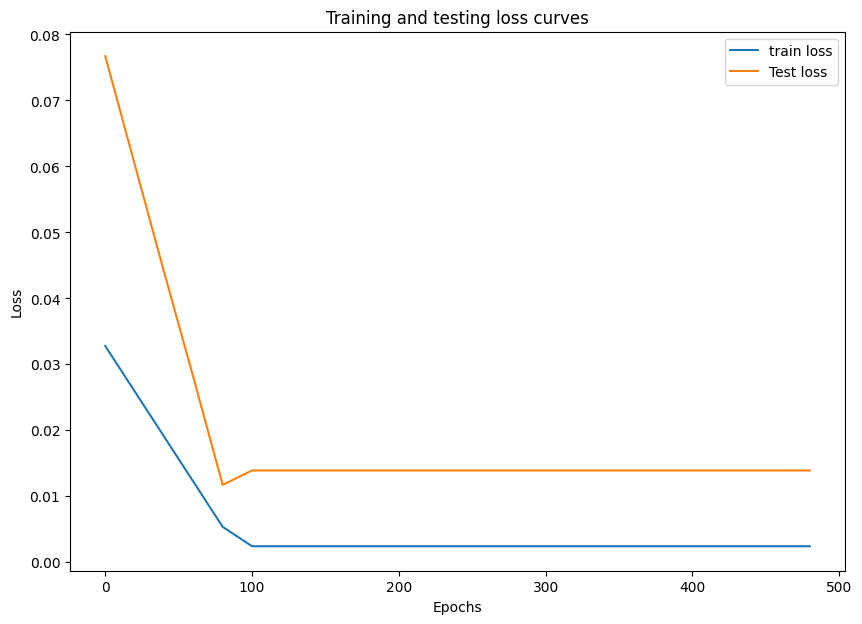

In [149]:
# visualizing the train and test loss 
plt.figure(figsize=(10,7))
plt.plot(epoch_count,(torch.tensor(loss_values).numpy()),label="train loss")
plt.plot(epoch_count,test_loss_values,label="Test loss")
plt.title("Training and testing loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [150]:
model.state_dict(),weight,bias

(OrderedDict([('weights', tensor([0.3056])), ('bias', tensor([0.8953]))]),
 0.3,
 0.9)

In [151]:
with torch.inference_mode():
    y_preds_new = model(X_test)

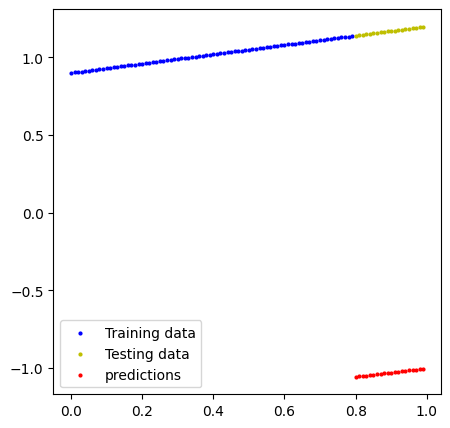

In [162]:
plot_predictions(predictions=y_preds);

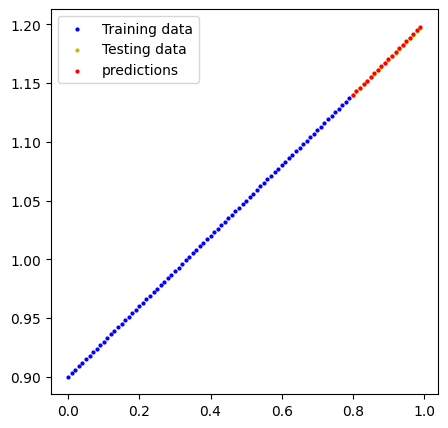

In [163]:
plot_predictions(predictions=y_preds_new);

In [164]:
# saving the model state dict (most convenient method for saving rather than saving whole model)
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME = "01_exercise_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(),f=MODEL_SAVE_PATH)

Saving model to models/01_exercise_model.pth


In [165]:
# Loading the model 

#lets instantize the model
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

print(f"loaded model:{loaded_model}")

loaded model:LinearRegressionModel()


/tmp/ipykernel_7628/284432719.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))


In [166]:
loaded_model.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test)
y_preds == loaded_model_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])